## **Importing python libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House_prediction.csv to House_prediction.csv


In [ ]:
df= pd.read_csv("House_prediction.csv")
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


### **Counting number of rooms as per the area**.

---



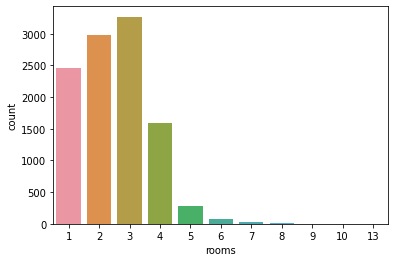

In [ ]:

sns.countplot(x ='rooms' , data = df)
plt.show()


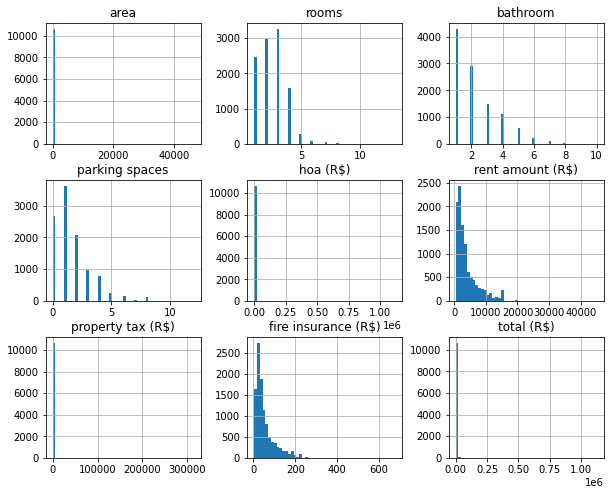

In [ ]:
df.hist(bins=50, figsize=(10, 8))
plt.show()

### **For finding the relationship between the features, we can find the correlation heatmap.**

---



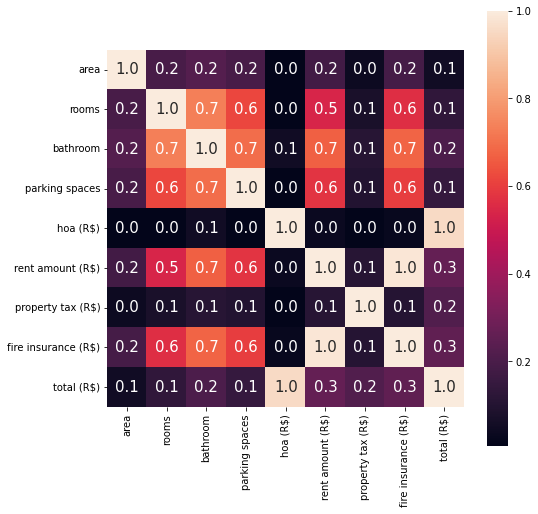

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cbar=True, square =True , fmt='0.1f',annot_kws={"size":15},annot=True,)


**From above inferred heatmap we can select our features from which we can exploit more details from it as:**

---



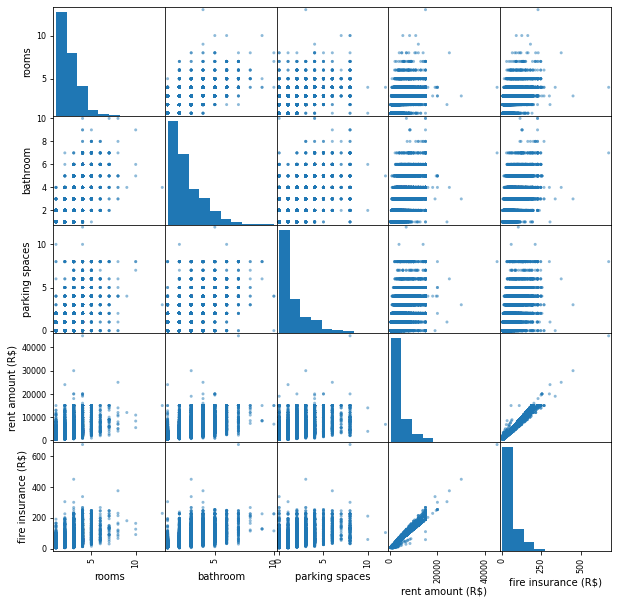

In [ ]:
from pandas.plotting import scatter_matrix
features=["rooms", "bathroom", "parking spaces", "rent amount (R$)" ,"fire insurance (R$)"]
scatter_matrix(df[features],figsize=(10,10))

plt.show()

From above pairplot we can see that (rent amount and fire insurance) and(fire insurance and parking space have positive correlation) have strong positive correlation )

### **Now since we are able to see that, we can get some valid data's by plotting  total amount  with**

### 1. Rent amount
### 2. Fire insurance
### 3. hoa 

## **1. Total vs rent amount**

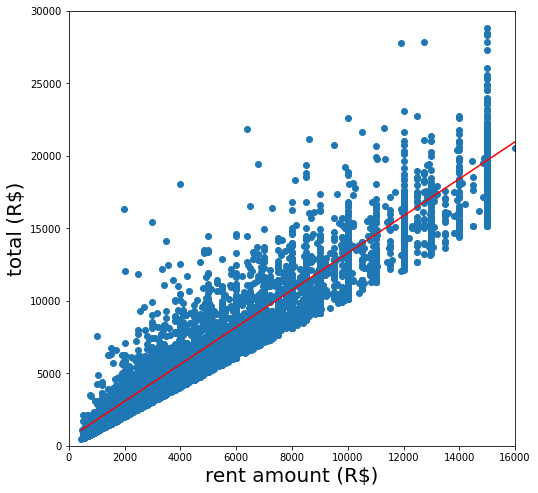

In [ ]:
plt.figure(figsize=(8,8))
#plt.scatter(df["hoa (R$)"],df['total (R$)'])
plt.scatter(df["rent amount (R$)"],df['total (R$)'])
plt.xlim([0, 16000])
plt.ylim([0, 30000])
plt.xlabel('rent amount (R$)', fontsize=20)
plt.ylabel('total (R$)', fontsize=20)
plt.plot(np.unique(df["rent amount (R$)"]), np.poly1d(np.polyfit(df["rent amount (R$)"], df['total (R$)'], 1))
         (np.unique(df["rent amount (R$)"])), color='red')
plt.show()

## **2. Total vs Fire insurance**

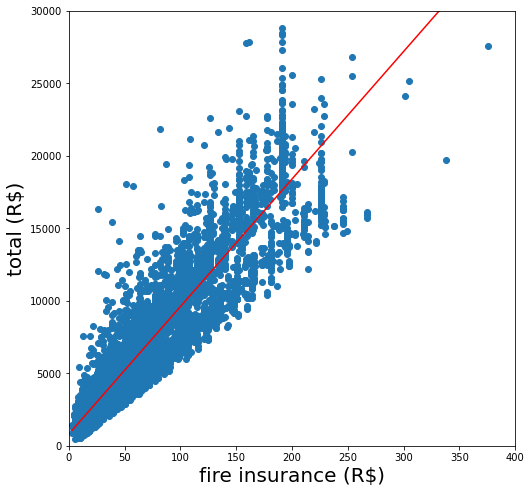

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df["fire insurance (R$)"],df['total (R$)'])

plt.xlim([0, 400])
plt.ylim([0, 30000])
plt.xlabel('fire insurance (R$)', fontsize=20)
plt.ylabel('total (R$)', fontsize=20)
plt.plot(np.unique(df["fire insurance (R$)"]), np.poly1d(np.polyfit(df["fire insurance (R$)"], df['total (R$)'], 1))
         (np.unique(df["fire insurance (R$)"])), color='red')
plt.show()

## **3. Total vs Fire insurance**

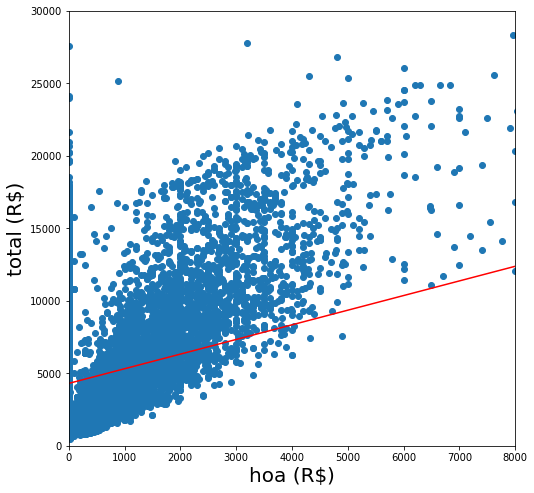

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df["hoa (R$)"],df['total (R$)'])

plt.xlim([0, 8000])
plt.ylim([0, 30000])
plt.xlabel('hoa (R$)', fontsize=20)
plt.ylabel('total (R$)', fontsize=20)
plt.plot(np.unique(df["hoa (R$)"]), np.poly1d(np.polyfit(df["hoa (R$)"], df['total (R$)'], 1))
         (np.unique(df["hoa (R$)"])), color='red')
plt.show()